## Qiskit Aer - Simulators

In [6]:
## Library Imports
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

#### The Aer Simulators

In [7]:
'''
1. AerSimulator.available_devices() : Return the available simulation devices.
2. AerSimulator.available_methods() : Return the available simulation methods.

'''

simulator = AerSimulator()

#### Simulating a Quantum Circuit

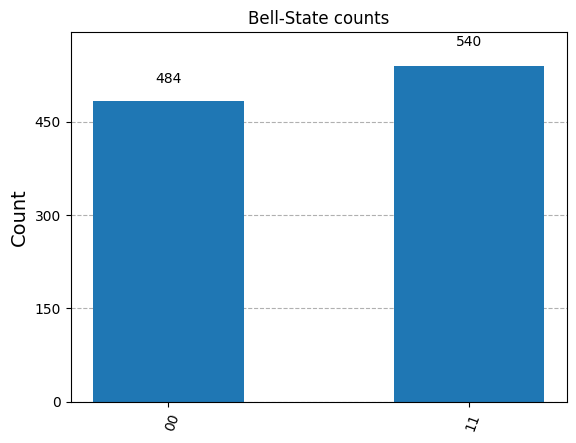

In [8]:
# Create circuit
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()

# Transpile for simulator
simulator = AerSimulator()
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

In [9]:
# Run and get memory
result = simulator.run(circ, shots=10, memory=True).result()
memory = result.get_memory(circ)
print(memory)

['00', '00', '00', '11', '00', '00', '11', '00', '00', '11']


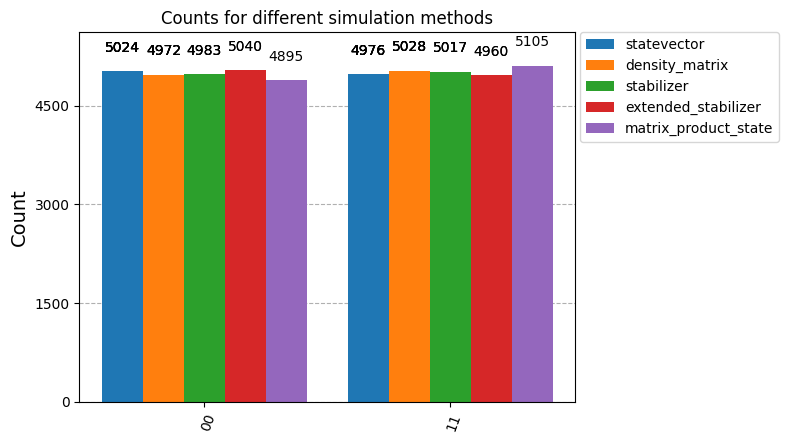

In [10]:
# Increase shots to reduce sampling variance
shots = 10000



# Statevector simulation method
sim_statevector = AerSimulator(method='statevector')
job_statevector = sim_statevector.run(circ, shots=shots)
counts_statevector = job_statevector.result().get_counts(0)

# Stabilizer simulation method
sim_stabilizer = AerSimulator(method='stabilizer')
job_stabilizer = sim_stabilizer.run(circ, shots=shots)
counts_stabilizer = job_stabilizer.result().get_counts(0)


# Extended Stabilizer method
sim_extstabilizer = AerSimulator(method='extended_stabilizer')
job_extstabilizer = sim_extstabilizer.run(circ, shots=shots)
counts_extstabilizer = job_extstabilizer.result().get_counts(0)

# Density Matrix simulation method
sim_density = AerSimulator(method='density_matrix')
job_density = sim_density.run(circ, shots=shots)
counts_density = job_density.result().get_counts(0)

# Matrix Product State simulation method
sim_mps = AerSimulator(method='matrix_product_state')
job_mps = sim_mps.run(circ, shots=shots)
counts_mps = job_mps.result().get_counts(0)


plot_histogram([ counts_statevector,counts_stabilizer ,counts_extstabilizer, counts_density, counts_mps],
               title='Counts for different simulation methods',
               legend=[ 'statevector',
                       'density_matrix','stabilizer','extended_stabilizer', 'matrix_product_state'])

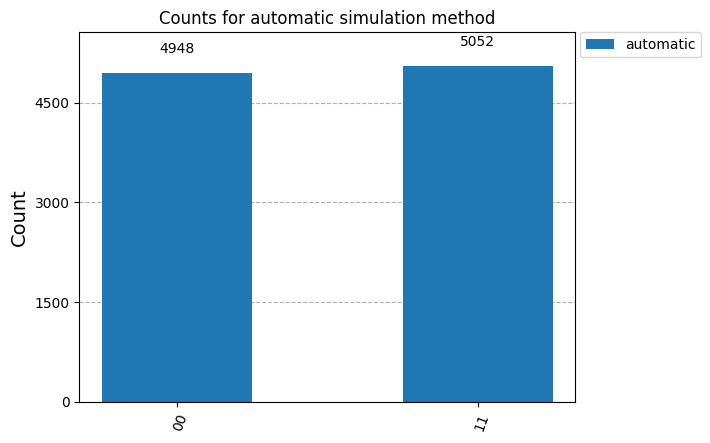

In [11]:
# automatic
sim_automatic = AerSimulator(method='automatic')
job_automatic = sim_automatic.run(circ, shots=shots)
counts_automatic = job_automatic.result().get_counts(0)

plot_histogram([counts_automatic], title='Counts for automatic simulation method',legend=[ 'automatic'])

In [12]:
from qiskit_aer import AerError

# Initialize a GPU backend
# Note that the cloud instance for tutorials does not have a GPU
# so this will raise an exception.
try:
    simulator_gpu = AerSimulator(method='statevector', device='GPU')

except AerError as e:
    print(e)

In [13]:
from qiskit_aer import AerError

# Initialize a GPU backend
# Note that the cloud instance for tutorials does not have a GPU
# so this will raise an exception.
try:
    simulator_gpu = AerSimulator(method='tensor_network', device='GPU')

except AerError as e:
    print(e)

"Invalid simulation method tensor_network. Available methods are: ('automatic', 'statevector', 'density_matrix', 'stabilizer', 'matrix_product_state', 'extended_stabilizer', 'unitary', 'superop')"


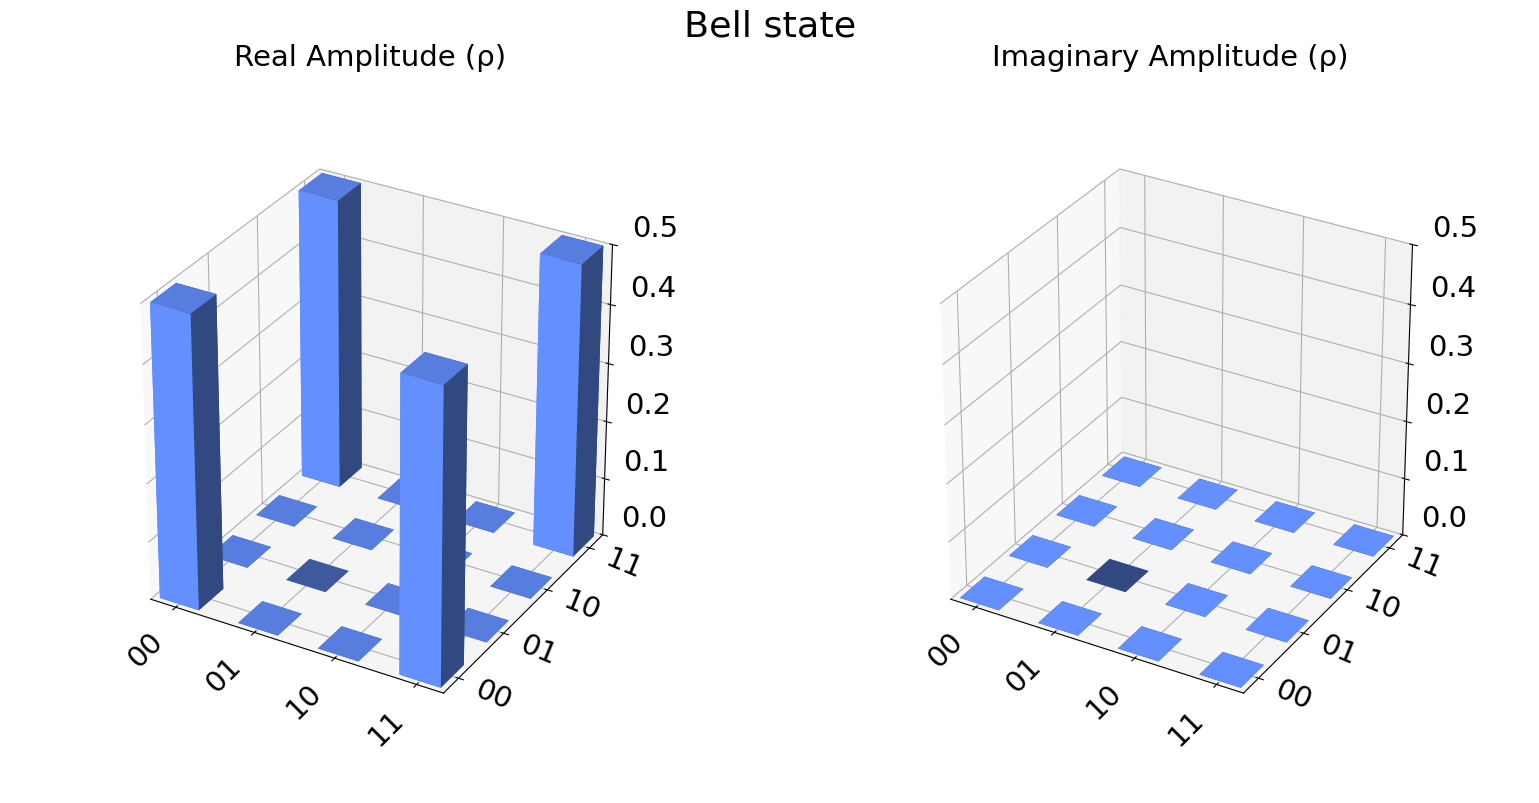

In [14]:
# Construct quantum circuit without measure
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.save_statevector()

# Transpile for simulator
simulator = AerSimulator(method='statevector')
circ = transpile(circ, simulator)

# Run and get statevector
result = simulator.run(circ).result()
statevector = result.get_statevector(circ)
plot_state_city(statevector, title='Bell state')